<h1 style="text-align: center;">Fertilidad El Tezal</h1>

Se hará un estudio de mercado para concer las caracteristicas macroeconomicas y microenomicas de la region del Tezal, Los Cabos, Baja California Sur. 

-  Primero conoceremos las plazas comerciales y comercios que hay en la zona de estudio  atravez de Google Maps 

In [1]:
import sys
import pandas as pd

sys.path.append('../Funciones') 

from funciones import obtener_establecimientos_localidad
from funciones import graficar_interactivo
from funciones import analizar_columnas
from funciones import obtener_informacion_restaurante
from funciones import calcular_distancia_haversine

from pathlib import Path

## Comcercios en la zona del Tezal y Cabo San Lucas 

- Plaza, Oxxo, Farmacias , Supermercados: En la Zona del Tezal y Cabo San Lucas, utilizando las siguientes coordenadas: 22.90100339356556, -109.8980583708473 a un radio de 10km 

In [ ]:
# Oxxos, Farmacias, Supermercados en la zona Tezal y Cabo San Lucas en un radio de búsqueda de 10km

# Coordenadas
coordenadas = (22.90100339356556, -109.8980583708473)  

# Lista de establecimeintos a buscar
establecimientos = ["Plaza","Oxxo","Farmacias","Supermercados"]

#Llamamos la funcion 
establecimientos_tezal= obtener_establecimientos_localidad(coordenadas, establecimientos,10)

# Graficar el número de comercios con la funcion creada grafica interactiva 
graficar_interactivo(establecimientos_tezal,"Establecimiento","Comercios en la Zona Tezal","Comercio_Zona__Tezal_Cabo.html",tipo_grafica="pie")

## Comercios en la zona extendida Tezal

- Oxxo, Farmacias, Supermercados, cafeterías, restaurantes, gimnasios: en la zona Tezal en un radio de búsqueda de 2km dada las siguientes coordenadas 22.913908626292955, -109.89229590854083


In [ ]:
# Oxxos, Farmacias, Supermercados en la zona Tezal en un radio de búsqueda de 2km

# Coordenadas de Tezal 
coordenadas_1 = (22.90798720983836, -109.87640295964026)  

# Lista de establecimeintos a buscar
establecimientos_1 = ["Oxxo","Farmacias","Supermercados","cafeterías", "restaurantes", "gimnasios"]

# Llamamos la funcion para obtener los resultados de la busqueda
establecimientos_tezal_nuclear= obtener_establecimientos_localidad(coordenadas_1, establecimientos_1,2)
#establecimientos_tezal_nuclear.drop('ID', axis=1, inplace=True)


# Graficar el número de comercios con la funcion creada grafica interactiva 
graficar_interactivo(establecimientos_tezal_nuclear,"Establecimiento","Comercios en la Zona extendida Tezal","Comercio_Zona_Extendida_Tezal.html",tipo_grafica="pie")

## Comercios en la Zona Nuclear Tezal 

- Oxxo, Farmacias, Supermercados, Cafeterías, Restaurantes, Gimnasios: en la zona nuclear en un radio de búsqueda de 1km dada las siguientes coordenadas 22.90798720983836, -109.87640295964026, siendo el lugar exacto donde estara la plaza comercial Tramonti 


In [ ]:
# Oxxos, Farmacias, Supermercados en la zona nuclear del Tezal en un radio de búsqueda de 1km

# Coordenadas de Tezal 
coordenadas_2 = (22.90798720983836, -109.87640295964026)  

# Lista de establecimeintos a buscar
establecimientos_2 = ["Plazas"]#,"Oxxo","Farmacias","Supermercados","Cafeterías", "Restaurantes", "Gimnasios"]

#Llamamos la funcion para obtener el dataFramen
establecimientos_tezal_2= obtener_establecimientos_localidad(coordenadas_2, establecimientos_2,1)

establecimientos_tezal_2.drop('ID', axis=1, inplace=True)
establecimientos_tezal_2

# Graficar el número de comercios con la funcion creada grafica interactiva 
#graficar_interactivo(establecimientos_tezal_2,"Establecimiento","Comercios en la Zona extendida Tezal","Comercio_Zona_nuclear_Tezal.html",tipo_grafica="pie")

In [ ]:
#print(f'El nombre de los comercios en la zona son: {establecimientos_tezal_2["Nombre de establecimiento"].unique().tolist()}')


### Analizaremos los DENUES en la zona Tezal

In [ ]:
import pandas as pd
import numpy as np

# Ruta relativa al archivo CSV
denue_cabo = Path("C:/Users/julio_2h7cnt5/OneDrive/Documentos/Ideas Frescas/MacroDatos/Base datos TEZAL Los Cabos/DENUE_LOS_CABOS.csv") 

# Se exporta la base de datos con la que se va a trabajar que se descargo de la DENUE
denue_cabo = pd.read_csv(denue_cabo, encoding='ISO-8859-1')

# Diccionario scian
scian = pd.read_excel("C:/Users/julio_2h7cnt5/OneDrive/Documentos/Ideas Frescas/MacroDatos/Diccionarios/Diccionario SCIAN.xlsx") # Base de datos diccinario del SCIAN
# Diccionario de datos de la base de datos SCIAN, 
scian = scian[scian["Código"].astype(str).str.fullmatch(r"^\d{3}")] # Se filtro solo a los codigos de 3 digitos que nos indican la principal actividad economico
scian["Título"] = scian["Título"] .str.rstrip("T") # Se limpia los datos de la Columna Título
scian = scian[["Código", "Título"]] # Solo usas las siguentes columnas para hacer el filtro 


# AGEB en la zona de estudio
zona_estudio = ["0040","0303","0479","1956","248A","3473","3488","3492","3505","3539","3609"]

# Diccionario de Variables 
'''
Diccionario de Columnas a Utilizar 
Nombre de la Unidad Económica: Es el nombre comercial o nombre exterior con el que se identifica o anuncia la unidad económica.

Código de la clase de actividad SCIAN: El código está asignado con base en la actividad principal que desarrolla la unidad económica y de acuerdo con el Sistema de Clasificación
Industrial para América del Norte.

Descripcion estrato personal ocupado: Permite identificar el tamaño de Unidades Económicas por el número
de personal que emplean.

Tipo de vialidad: Es la superficie del terreno destinada para el tránsito vehicular y/o peatonal, en la cual se encuentra ubicada la unidad económica (calle, avenida,
andado.

Tipo de asentamiento humano: Es la clasificación que se da al asentamiento humano de acuerdo con su función (colonia, fraccionamiento, unidad habitacional, etc.).

Nombre de asentamiento humano:Es el sustantivo propio con el cual se identifica el asentamiento humano.

Tipo centro comercial: Son los caracteres alfanuméricos con los que se identifica el tipo de plaza, centro comercial, mercado.

Tipo de establecimiento: En este tipo de establecimiento están comprendidas las viviendas cuando en algún espacio de la casa-habitación, que también está destinado a
otras actividades cotidianas, se realiza alguna actividad económica.

Fecha de incorporación al DENUE: Fecha en la que la unidad económica se integró al Directorio Estadístico Nacional de Unidades Económicas.

Área geoestadística básica: Marco Geoestadístico Naciona.

Manzana: xtensión territorial que está constituida por un grupo de
viviendas, edificios, predios, lotes o terrenos de uso habitacional, comercial, industrial o de servicios.

Latitud: Es la distancia que existe entre la unidad económica y el ecuador. 

Fecha en la que la unidad económica se integró al Directorio Estadístico Nacional de Unidades Económicas.

Longitud: Es la distancia que existe entre la unidad económica y el meridiano de Greenwich.-

'''

# Lista de variables a considerar y filtrado por esas columnas 
denue_m_poligonos = denue_cabo[[
    'nom_estab',
    'codigo_act',
    'per_ocu',
    'tipo_vial',
    'tipo_asent',
    'nomb_asent',
    'tipoCenCom',
    'nom_CenCom',
    'fecha_alta',
    'ageb',
    'manzana',
    'latitud',
    'longitud'
]]

# Filtramos solo por los AGEB de estudio y limpiamos la base de datos
denue_m_poligonos = denue_m_poligonos[denue_m_poligonos['ageb'].isin(zona_estudio)].replace({'*': '0', np.nan: "Desconocido"})

# Limpieza de datos
# Solo se considerará el año en la Fecha de incorporación al DENU
denue_m_poligonos["Fecha de incorporación DENU"] = denue_m_poligonos['fecha_alta'].astype(str).str[:4]
# Posicionar la nueva columna en donde sea más facil leer la información 
col_f = denue_m_poligonos.pop("Fecha de incorporación DENU")
denue_m_poligonos.insert(9,"Fecha de incorporación DENU", col_f)

# Agregar la principal actividad economica SCIAN a cada DENUE, basado en el diccionario que se descargo 

# Considerar solo los tres primeros digitos  del SCIAN para hacer la conección con las dos bases de datos. 
denue_m_poligonos["CLAVE SCIAN"] = denue_m_poligonos["codigo_act"].astype(str).str[:3]

# Se unen las dos bases de datos para obtener la principal actividad economica
denue_m_poligonos = denue_m_poligonos.merge(scian,left_on="CLAVE SCIAN", right_on="Código", how = "left")

# Se renombra la columna a utilizar
denue_m_poligonos = denue_m_poligonos.rename(columns={"Título": "Principal Actividad Economica"})

# Se eliminan las columnas que ya no son necesarias 
denue_m_poligonos = denue_m_poligonos.drop(columns=["CLAVE SCIAN","Código","fecha_alta"])

# Posicionar la nueva columna en donde sea más facil leer la información 
col_a = denue_m_poligonos.pop("Principal Actividad Economica")
denue_m_poligonos.insert(2,"Principal Actividad Economica", col_a)

# Posicionar la nueva columna en donde sea más facil leer la información 
col_a = denue_m_poligonos.pop("Principal Actividad Economica")
denue_m_poligonos.insert(2,"Principal Actividad Economica", col_a)

# Crear el CSV de la base de datos filtrados 
denue_m_poligonos.to_csv("DENUE_Tezal_Zona_estudio.csv", index=False, encoding='ISO-8859-1')

# Graficar el número de comercios con la funcion creada grafica interactiva 
concentrado_denue = analizar_columnas(denue_m_poligonos,"Principal Actividad Economica",100)

# Crear el CSV de la base de datos filtrados 
concentrado_denue.to_csv("Total de SCIAN en el Tezal.csv", index=False, encoding='ISO-8859-1')

concentrado_denue.head()


### DENUES en los cabos 

Aqui podemos ver un pequeño listado sobre las principales actividades economicas de los DENUES

In [ ]:
denue_m_poligonos_cabo = denue_cabo[[
    'nom_estab',
    'codigo_act',
    'per_ocu',
    'tipo_vial',
    'tipo_asent',
    'nomb_asent',
    'tipoCenCom',
    'nom_CenCom',
    'fecha_alta',
    'ageb',
    'manzana',
    'latitud',
    'longitud'
]]

# Limpieza de datos
# Solo se considerará el año en la Fecha de incorporación al DENU
denue_m_poligonos_cabo["Fecha de incorporación DENU"] = denue_m_poligonos_cabo['fecha_alta'].astype(str).str[:4]
# Posicionar la nueva columna en donde sea más facil leer la información 
col_f = denue_m_poligonos_cabo.pop("Fecha de incorporación DENU")
denue_m_poligonos_cabo.insert(9,"Fecha de incorporación DENU", col_f)

# Agregar la principal actividad economica SCIAN a cada DENUE, basado en el diccionario que se descargo 

# Considerar solo los tres primeros digitos  del SCIAN para hacer la conección con las dos bases de datos. 
denue_m_poligonos_cabo["CLAVE SCIAN"] = denue_m_poligonos_cabo["codigo_act"].astype(str).str[:3]

# Se unen las dos bases de datos para obtener la principal actividad economica
denue_m_poligonos_cabo = denue_m_poligonos_cabo.merge(scian,left_on="CLAVE SCIAN", right_on="Código", how = "left")

# Se renombra la columna a utilizar
denue_m_poligonos_cabo = denue_m_poligonos_cabo.rename(columns={"Título": "Principal Actividad Economica"})

# Se eliminan las columnas que ya no son necesarias 
denue_m_poligonos_cabo = denue_m_poligonos_cabo.drop(columns=["CLAVE SCIAN","Código","fecha_alta"])

# Posicionar la nueva columna en donde sea más facil leer la información 
col_a = denue_m_poligonos_cabo.pop("Principal Actividad Economica")
denue_m_poligonos_cabo.insert(2,"Principal Actividad Economica", col_a)

# Posicionar la nueva columna en donde sea más facil leer la información 
col_a = denue_m_poligonos_cabo.pop("Principal Actividad Economica")
denue_m_poligonos_cabo.insert(2,"Principal Actividad Economica", col_a)

# Crear el CSV de la base de datos filtrados 
denue_m_poligonos_cabo.to_csv("Base de datos DENUES Los Cabos.csv", index=False, encoding='ISO-8859-1')

# Graficar el número de comercios con la funcion creada grafica interactiva 
concentrado_denue_cabo = analizar_columnas(denue_m_poligonos_cabo,"Principal Actividad Economica",100)

# Crear el CSV de la base de datos filtrados 
concentrado_denue_cabo.to_csv("Total de SCIAN en los Cabos.csv", index=False, encoding='ISO-8859-1')

concentrado_denue_cabo.head()

#### Analizar el trafico de personas que hay en la zona del Tezal

In [ ]:
# Calculareos en donde se centra la mayoria de las personas en la zona de estuido 

# Calculamos el número de DENUES que tiene de 0 a 5 personas empleadas hasta los 251 y más
personal_ocupado_dataframe = denue_m_poligonos['per_ocu'].value_counts().reset_index()

# Pasamos los reultados a un DataFrame
personal_ocupado_dataframe.columns = ["Descripcion estrato personal ocupado", 'Cantidad']

# Promediamos el númerp de personas empleadas por tamaño del DENUE
datos = [2.5,8,20.5,75.5,40.5,251,175.5]

# Calculamos la cantida de personas por tamaño de DENUE
personal_ocupado_dataframe["Número de personas"] = personal_ocupado_dataframe["Cantidad"] * datos

# Calculamos el total de personas empleadas en la zona 
suma_ocupa = personal_ocupado_dataframe["Número de personas"].sum()

# Agregar la columna de porcentaje
personal_ocupado_dataframe["Porcentaje"] = (personal_ocupado_dataframe["Número de personas"] / suma_ocupa) * 100

# Ordenemos de Mayor a menor 
personal_ocupado_dataframe = personal_ocupado_dataframe.sort_values(by='Porcentaje', ascending=False)

# Agregar la columna de porcentaje acumulado
personal_ocupado_dataframe["Porcentaje Acumulado"] = personal_ocupado_dataframe["Porcentaje"].cumsum()

porcentaje = 100
# Filtrar solo los valores cuyo porcentaje acumulado es menor o igual al especificado
personal_ocupado_dataframe = personal_ocupado_dataframe[personal_ocupado_dataframe["Porcentaje Acumulado"] <= porcentaje]

# Crear el CSV de la base de datos filtrados 
personal_ocupado_dataframe.to_csv("Descripcion estrato personal ocupado en EL Tezal.csv", index=False, encoding='ISO-8859-1')

print(f"El número de personas flotantes que se considera como trafico de personas en la zona de estudio es de: '{suma_ocupa}'. Los datos mostrados muetran el tamaño de las empresas que ocupan en {porcentaje} de todo el trafico de personas flotantes ")

personal_ocupado_dataframe

### Analizar el tipo de centro comercial donde se se encuentran los DENUES

In [ ]:
tipo_centro_comercial_tezal = analizar_columnas(denue_m_poligonos,'tipoCenCom',100)

tipo_centro_comercial_tezal.to_csv("Concentracion de los DENUES tipo centro comercial.csv", index=False, encoding='ISO-8859-1')

tipo_centro_comercial_tezal


##### Analizaremos los centros comerciales y plazas en la zona para ver el tipo de negocios 

In [ ]:
tipoCenCom = denue_m_poligonos[denue_m_poligonos['tipoCenCom'] == 'CENTRO Y PLAZA COMERCIAL']
centro_comercial = analizar_columnas(tipoCenCom,'nom_CenCom',100)
centro_comercial.to_csv("Total de DENUES en las plazas comerciales.csv", index=False, encoding='ISO-8859-1')
centro_comercial.head()

In [ ]:
tipo_de_denues_en_plazas = analizar_columnas(tipoCenCom,'Principal Actividad Economica',100)
tipo_de_denues_en_plazas.to_csv("Tipo de DENUES en las plazas y centros comerciales.csv", index=False, encoding='ISO-8859-1')
tipo_de_denues_en_plazas.head()

##### ¿Qúe tipo de restaurantes hay en la zona?

In [ ]:
restaurantes = tipoCenCom[tipoCenCom['Principal Actividad Economica']=='Servicios de preparación de alimentos y bebidas']
restaurantes_filtro = restaurantes[['nom_estab','nom_CenCom']]
# Aplicar la función a cada restaurante

# Aplicar la función para obtener calificación y tipo de cocina
restaurantes_filtro[['calificacion', 'tipo_cocina', 'tipo_lugar']] = restaurantes_filtro.apply(obtener_informacion_restaurante, axis=1)


In [ ]:
#restaurantes_filtro.to_csv("Información de restaurantes en las plazas Zona Tezal.csv", index=False, encoding='ISO-8859-1')
restaurantes_filtro.head()

## Analizar las plazas a 1km de Tramonti 

In [ ]:
establecimientos_tezal_2=establecimientos_tezal_2[establecimientos_tezal_2['Establecimiento']== 'Plazas']
establecimientos_tezal_2

In [ ]:
# Plaza del Rey, Plaza Novva, Plaza paseo los arcos 
denue_m_poligonos_nuclear = denue_m_poligonos[denue_m_poligonos['nom_CenCom'].isin(['PLAZA PROVIDENCIA','PLAZA TRANSPENINSULAR','PLAZA CORONADO','PLAZA COMERCIAL PUNTO TEZAL'])]
denue_m_poligonos_nuclear.head()

In [ ]:
def filtrar_por_distancia(df, lat_ref, lon_ref, distancia_max):
    # Calcular la distancia de cada punto
    df['distancia'] = df.apply(lambda row: calcular_distancia_haversine(row['latitud'], row['longitud'], lat_ref, lon_ref), axis=1)
    
    # Filtrar distancia menor o igual a 1 km
    df_filtrado = df[df['distancia'] <= distancia_max]
    return df_filtrado


In [ ]:
# Usar la función para filtrar el DataFrame
distancia_max = 1  # 1 km
denue_filtrado = filtrar_por_distancia(denue_m_poligonos, coordenadas_2[0], coordenadas_2[1], distancia_max)

# Mostrar el DataFrame filtrado
denue_filtrado.head()

In [ ]:
denue_filtrado['nom_CenCom'].value_counts()

In [ ]:
denue_filtrado_centro_desco = denue_filtrado[denue_filtrado['nom_CenCom']=='Desconocido']
denue_filtrado_centro_desco.columns

In [ ]:
# DENUES EN PLAZA NOVVA
distancia_max = .3  # 100 metros 
coordenadas_4=[22.90891300152124, -109.87966843179503]
denue_filtrado = filtrar_por_distancia(denue_filtrado_centro_desco, coordenadas_4[0], coordenadas_4[1], distancia_max)

# 
denue_filtrado.head()

In [ ]:
# Obtenermos todos los comercios en la zona del Tezal a un radio de 4 km
#  Coordenadas de Tezal 
coordenadas_tramonti = (22.90798720983836, -109.87640295964026)  

# Lista de establecimeintos a buscar
comercios = ['Hoteles','Restaurantes','Cafeterías','Bares','Peluquerías','Estéticas','Consultorios médicos',
             'Farmacias','Tiendas','Supermercados','Centros comerciales','Bancos','Cajeros','Gimnasios','Oxxo'
             'Veterinarias','Librerías','Pastelerías','Panaderías','Fruterías','Gasolineras','Oficinas de correos',
             'Parques','Museos','Cines','Teatros','Escuelas','Universidades','Centros de salud',
             'Clínicas dentales','Centros de fisioterapia','Abogados','Notarías','Talleres de reparación de autos','Paradas de autobuses',
             'Aeropuertos','Ópticas','Tiendas de deportes','Jugueterías','Tiendas de cosméticos','Centros de belleza','Clubes deportivos','Piscinas','Centros de yoga',
             'Centros de pilates','Establecimientos de comida rápida','Hamburgueserías','Pizzerías',
             'Sushi bars','Heladerías','Pubs','Bares de copas','Salas de conciertos','Casas de cambio','Centros comerciales outlet',
             'Hoteles boutique','Posadas','Hostales','Resorts','Establecimientos de alquiler de coches',
             'Agencias inmobiliarias','Consultorios psicológicos','Centros de nutrición','Consultorios de podología','Spa','Casinos','Salas de juegos',
             'Bibliotecas','Escuelas de música','Academias de danza','Centros de arte',
             'Tiendas de vinos y licores','Guarderías','Clubes nocturnos','Tiendas de tatuajes','Salones de uñas','Centros de piercing',
             'Clubs de lectura','Centros de intercambio cultural','Pistas de patinaje','Centros de actividades acuáticas','Hoteles con spa','Discotecas',
             'Campos de golf']

#Llamamos la funcion para obtener el dataFramen
base_datos_comercios= obtener_establecimientos_localidad(coordenadas_tramonti, comercios,6)

base_datos_comercios.drop('ID', axis=1, inplace=True)
base_datos_comercios.head()



Las plazas a 1km a la redonda son 
- Plaza Providencia
- Plaza Del Rey
- Plaza NOVVA

In [ ]:
# Plaza Novva
distancia_novva = .100  # 100 m
coordenadas_novva = [22.908362043831414, -109.87972814312029]
comercios_novva = filtrar_por_distancia(base_datos_comercios, coordenadas_novva[0], coordenadas_novva[1], distancia_novva)
comercios_novva.to_csv("Comercios Plaza Novva.csv", index=False, encoding='utf-8')

# Mostrar el DataFrame filtrado
#comercios_novva.head()

# Plaza Providencia
distancia_providencia= .150  # 100 m
coordenadas_providencia = [22.90331157018511, -109.88398953562401]
comercios_providencia= filtrar_por_distancia(base_datos_comercios, coordenadas_providencia[0], coordenadas_providencia[1], distancia_providencia)
comercios_providencia.to_csv("Comercios Plaza Providencia.csv", index=False, encoding='utf-8')

# Mostrar el DataFrame filtrado
#comercios_providencia.head()

# Plaza del Rey
distancia_rey= .150  # 100 m
coordenadas_rey = [22.906074644865704, -109.86736500497784]
comercios_rey= filtrar_por_distancia(base_datos_comercios, coordenadas_rey[0], coordenadas_rey[1], distancia_rey)
comercios_rey.to_csv("Comercios Plaza del Rey.csv", index=False, encoding='utf-8')

# Mostrar el DataFrame filtrado
#comercios_rey.head()

plaza_zona_extendida = pd.concat([comercios_novva, comercios_providencia, comercios_rey], ignore_index=True)
plaza_zona_extendida.to_csv("Total de comercios en las tres plazas a un km Tramonti.csv", index=False, encoding='utf-8')

tipo_esta = analizar_columnas(plaza_zona_extendida,'Establecimiento',100)
tipo_esta.to_csv("Tipo de comercios en las tres plazas a un km Tramonti.csv", index=False, encoding='utf-8')
tipo_esta.head()

Plazas a 2 km de distancia 
- Plaza Providencia
- Plaza Del Rey
- Plaza NOVVA
- Plaza San Lucas
- Plaza Paseo Los Arcos
- Plaza S. Juan Diego
- Plaza Transpeninsular
- Plaza Punto Tezal

In [ ]:
# Plaza San Lucas
distancia_sanlucas= .120  # 100 m
coordenadas_sanlucas = [22.902530939553348, -109.89862203600859]
comercios_sanlucas= filtrar_por_distancia(base_datos_comercios, coordenadas_sanlucas[0], coordenadas_sanlucas[1], distancia_sanlucas)
comercios_sanlucas.to_csv("Comercios Plaza San Lucas.csv", index=False, encoding='utf-8')

# Mostrar el DataFrame filtrado
#comercios_sanlucas.head()

# Plaza Paseo Los Arcos
distancia_arcos= .100  # 200 m
coordenadas_arcos = [22.90761632865922, -109.86561105343829]
comercios_arcos= filtrar_por_distancia(base_datos_comercios, coordenadas_arcos[0], coordenadas_arcos[1], distancia_arcos)
comercios_arcos.to_csv("Comercios Plaza Paseo Los Arcos.csv", index=False, encoding='utf-8')


# Mostrar el DataFrame filtrado
#comercios_arcos.head()

# Plaza S. Juan Diego
distancia_juands= .100  # 200 m
coordenadas_juands = [22.90367845018197, -109.88724519686312]
comercios_juands= filtrar_por_distancia(base_datos_comercios, coordenadas_juands[0], coordenadas_juands[1], distancia_juands)
comercios_juands.to_csv("Comercios Plaza S Juan Diego.csv", index=False, encoding='utf-8')

# Mostrar el DataFrame filtrado
#comercios_juands.head()

# Plaza Transpeninsular
distancia_peninsular= .100  # 200 m
coordenadas_peninsular = [22.90228802182078, -109.88352853570174]
comercios_peninsular= filtrar_por_distancia(base_datos_comercios, coordenadas_peninsular[0], coordenadas_peninsular[1], distancia_peninsular)
comercios_peninsular.to_csv("Comercios Plaza Transpeninsular.csv", index=False, encoding='utf-8')

# Mostrar el DataFrame filtrado
#comercios_peninsular.head()

# Plaza Punto Tezal
distancia_ptezal= .100  # 200 m
coordenadas_ptezal = [22.91292994258383, -109.88133078816062]
comercios_ptezal= filtrar_por_distancia(base_datos_comercios, coordenadas_ptezal[0], coordenadas_ptezal[1], distancia_ptezal)
comercios_ptezal.to_csv("Comercios Plaza Punto Tezal.csv", index=False, encoding='utf-8')

# Mostrar el DataFrame filtrado
#comercios_ptezal.head()

# Plaza Costmar 
distancia_costmar = .100  # 200 m
coordenadas_costmar = [22.90377620047898, -109.8931142632715]
comercios_costmar= filtrar_por_distancia(base_datos_comercios, coordenadas_costmar[0], coordenadas_costmar[1], distancia_costmar)
comercios_costmar.to_csv("Comercios Plaza Costmar.csv", index=False, encoding='utf-8')

# Mostrar el DataFrame filtrado
#comercios_costmar.head()

# Plaza Coronado 
distancia_coronado = .100  # 200 m
coordenadas_coronado = [22.909694821392737, -109.87669683665835]
comercios_coronado= filtrar_por_distancia(base_datos_comercios, coordenadas_coronado[0], coordenadas_coronado[1], distancia_coronado)
comercios_coronado.to_csv("Comercios Plaza Coronado.csv", index=False, encoding='utf-8')

# Mostrar el DataFrame filtrado
# comercios_coronado.head()

plaza_zona_extendida_dos_km = pd.concat([plaza_zona_extendida, comercios_sanlucas, comercios_coronado,comercios_costmar,
                                         comercios_ptezal,comercios_peninsular,comercios_juands,comercios_arcos,comercios_sanlucas], ignore_index=True)
plaza_zona_extendida_dos_km.to_csv("Total de comercios en las siete plazas a dos km Tramonti.csv", index=False, encoding='utf-8')

tipo_esta_2 = analizar_columnas(plaza_zona_extendida_dos_km,'Establecimiento',100)
tipo_esta_2.to_csv("Tipo de comercios en las siete plazas a dos km Tramonti.csv", index=False, encoding='utf-8')
tipo_esta_2.head()

Plazas relacionadas con la zona de estudio 
- La Marea - Plaza Península
- Starbucks selecto
- Plaza del pescardor
- Plaza la caseada
- Dolce Villa Walmart
- Koral Center
- Plaza San Lucas 
- Plaza Atrium San José del Cabo 
- Plaza Paraiso 
- Plaza Ocean 
- Plaza Costa Sur 
- Plaza Dhoka

In [ ]:
# San Jose del Cabo Comercios
coordenadas_sanjose = (23.033339202680686, -109.71363935064197)  

#Llamamos la funcion para obtener el dataFramen
comercios_sanjose= obtener_establecimientos_localidad(coordenadas_sanjose, comercios,5)
comercios_sanjose.drop('ID', axis=1, inplace=True)


In [ ]:
# Starbucks selecto Bonita Mall
coordenadas_bonitam = [22.887256453961555, -109.9109018044448]
distancia_bonitam = .100  # 100 m
comercios_bonitam= filtrar_por_distancia(base_datos_comercios, coordenadas_bonitam[0], coordenadas_bonitam[1], distancia_bonitam)
comercios_bonitam.to_csv("Comercios Starbucks selecto Bonita Mall.csv", index=False, encoding='utf-8')
# Mostrar el DataFrame filtrado
# comercios_bonitam.head()



# La Marea - Plaza Península
distancia_mare = .100  # 100 m
coordenadas_mare = [23.038187471516554, -109.70945379507175]
comercios_mare= filtrar_por_distancia(comercios_sanjose, coordenadas_mare[0], coordenadas_mare[1], distancia_mare)
comercios_mare.to_csv("Comercios La Marea.csv", index=False, encoding='utf-8')
# Mostrar el DataFrame filtrado
#comercios_mare.head()



# Plaza del pescardor
coordenadas_pescador = [23.047246542532164, -109.69551205100494]
distancia_pescador = .100  # 100 m
comercios_pescador= filtrar_por_distancia(comercios_sanjose, coordenadas_pescador[0], coordenadas_pescador[1], distancia_pescador)
comercios_pescador.to_csv("Comercios Plaza del Pescardor.csv", index=False, encoding='utf-8')
# Mostrar el DataFrame filtrado
#comercios_pescador.head()



# Plaza la cascada
coordenadas_caseada = [23.05189608774528, -109.70321752936712]
distancia_caseada = .100  # 100 m
comercios_caseada= filtrar_por_distancia(comercios_sanjose, coordenadas_caseada[0], coordenadas_caseada[1], distancia_caseada)
comercios_caseada.to_csv("Comercios Plaza la Cascada.csv", index=False, encoding='utf-8')

# Mostrar el DataFrame filtrado
#comercios_pescador.head()



# Dolce Villa Walmart
coordenadas_dolcevilla = [23.04078616694554, -109.70436575380576]
distancia_dolcevilla = .100  # 100 m
comercios_dolcevilla= filtrar_por_distancia(comercios_sanjose, coordenadas_dolcevilla[0], coordenadas_dolcevilla[1], distancia_dolcevilla)
comercios_dolcevilla.to_csv("Comercios Plaza Dolce Villa Walmart.csv", index=False, encoding='utf-8')

# Mostrar el DataFrame filtrado
#comercios_dolcevilla.head()

comercios_bonitam,comercios_mare,comercios_pescador,comercios_caseada,comercios_dolcevilla

# Koral Center
coordenadas_koral= [23.00197378626526, -109.73421453889473]
distancia_koral = .100  # 100 m
comercios_koral= filtrar_por_distancia(comercios_sanjose, coordenadas_koral[0], coordenadas_koral[1], distancia_koral)
comercios_koral.to_csv("Comercios Plaza koral.csv", index=False, encoding='utf-8')

# Mostrar el DataFrame filtrado
#comercios_koral.head()



# Plaza San Lucas 
coordenadas_sanlucas = [22.901031830381168, -109.89899637633162] 
distancia_sanlucas = .100  # 100 m
comercios_sanlucas= filtrar_por_distancia(base_datos_comercios, coordenadas_sanlucas[0], coordenadas_sanlucas[1], distancia_sanlucas)
comercios_sanlucas.to_csv("Comercios Plaza San Lucas.csv", index=False, encoding='utf-8')

# Mostrar el DataFrame filtrado
#comercios_sanlucas.head()



# Plaza Atrium San José del Cabo
coordenadas_sancabo = [23.060343180567465, -109.69356190497224] 
distancia_sancabo = .100  # 100 m
comercios_sancabo= filtrar_por_distancia(comercios_sanjose, coordenadas_sancabo[0], coordenadas_sancabo[1], distancia_sancabo)
comercios_sancabo.to_csv("Comercios Atrium San José del Cabo.csv", index=False, encoding='utf-8')

# Mostrar el DataFrame filtrado
#comercios_sancabo.head()



# Plaza Paraiso 
coordenadas_paraiso = [22.887875806275225, -109.90938116922153] 
distancia_paraiso = .100  # 100 m
comercios_paraiso= filtrar_por_distancia(base_datos_comercios, coordenadas_paraiso[0], coordenadas_paraiso[1], distancia_paraiso)
comercios_paraiso.to_csv("Comercios Plaza Paraiso .csv", index=False, encoding='utf-8')

# Mostrar el DataFrame filtrado
#comercios_paraiso.head()



# Plaza Ocean  
coordenadas_ocean = [22.908271525192305, -109.87906335404251] 
distancia_ocean = .100  # 100 m
comercios_ocean= filtrar_por_distancia(base_datos_comercios, coordenadas_ocean[0], coordenadas_ocean[1], distancia_ocean)
comercios_ocean.to_csv("Comercios Plaza Ocean.csv", index=False, encoding='utf-8')

# Mostrar el DataFrame filtrado
#comercios_ocean.head()


# Plaza Costa Sur  
coordenadas_costasur = [22.921827205762813, -109.87836301928117] 
distancia_costasur = .100  # 100 m
comercios_costasur= filtrar_por_distancia(base_datos_comercios, coordenadas_costasur[0], coordenadas_costasur[1], distancia_costasur)
comercios_costasur.to_csv("Comercios Costa Sur.csv", index=False, encoding='utf-8')

# Mostrar el DataFrame filtrado
#comercios_costasur.head()



# Plaza Dhoka 
coordenadas_dhoka = [22.888539087873536, -109.91342876105907] 
distancia_dhoka = .100  # 100 m
comercios_dhoka= filtrar_por_distancia(base_datos_comercios, coordenadas_dhoka[0], coordenadas_dhoka[1], distancia_dhoka)
comercios_dhoka.to_csv("Comercios Dhoka.csv", index=False, encoding='utf-8')

# Mostrar el DataFrame filtrado
#comercios_dhoka.head()



plaza_zona_estudio = pd.concat([comercios_bonitam,comercios_mare,comercios_pescador,comercios_caseada,comercios_dolcevilla,
                                comercios_koral,comercios_sanlucas,comercios_sancabo,comercios_paraiso,comercios_ocean,
                                comercios_costasur,comercios_dhoka], ignore_index=True)

plaza_zona_estudio.to_csv("Total de comercios en las plazas de los levantamiento.csv", index=False, encoding='utf-8')


tipo_esta_3 = analizar_columnas(plaza_zona_estudio,'Establecimiento',100)
tipo_esta_3.to_csv("Tipo de comercios en las plazas del levantamiento.csv", index=False, encoding='utf-8')
tipo_esta_3.head()

Plazas lifestyle En México. 
- Guadalajara
       -  Punto Sur 
        -  Midtown

In [1]:
# Plaza Punto Sur 
coordenadas_punto_sur = (20.56934114710173, -103.45333884482773)  

#Llamamos la funcion para obtener el dataFramen
comercios_punto_sur= obtener_establecimientos_localidad(coordenadas_punto_sur, comercios,.250)
comercios_punto_sur.drop('ID', axis=1, inplace=True)
comercios_punto_sur.to_csv("Comercios Punto Sur GDL.csv", index=False, encoding='utf-8')
#comercios_punto_sur.head()

# Plaza Midtown
coordenadas_midtown = (20.694636639427486, -103.37566353389084)  

#Llamamos la funcion para obtener el dataFramen
comercios_midtown= obtener_establecimientos_localidad(coordenadas_midtown, comercios,.100)
comercios_midtown.drop('ID', axis=1, inplace=True)
comercios_midtown.to_csv("Comercios Midtown GDL.csv", index=False, encoding='utf-8')

#comercios_midtown.head()

plaza_gdl= pd.concat([comercios_punto_sur,comercios_midtown], ignore_index=True)

plaza_gdl.to_csv("Total de comercios en las plazas Guadalajara.csv", index=False, encoding='utf-8')


tipo_esta_gdl = analizar_columnas(plaza_gdl,'Establecimiento',100)
tipo_esta_gdl.to_csv("Tipo de comercios en las plazas de Guadalajara.csv", index=False, encoding='utf-8')
tipo_esta_gdl.head()

NameError: name 'obtener_establecimientos_localidad' is not defined

Plazas lifestyle En México. 
- Torreón
       -  Almanará
        

In [4]:
# Plaza Almanará Torreon
coordenadas_almanara = (25.58372339474475, -103.4085809693722)  
comercios = ['Hoteles','Restaurantes','Cafeterías','Bares','Peluquerías','Estéticas','Consultorios médicos',
             'Farmacias','Tiendas','Supermercados','Centros comerciales','Bancos','Cajeros','Gimnasios','Oxxo'
             'Veterinarias','Librerías','Pastelerías','Panaderías','Fruterías','Gasolineras','Oficinas de correos',
             'Parques','Museos','Cines','Teatros','Escuelas','Universidades','Centros de salud',
             'Clínicas dentales','Centros de fisioterapia','Abogados','Notarías','Talleres de reparación de autos','Paradas de autobuses',
             'Aeropuertos','Ópticas','Tiendas de deportes','Jugueterías','Tiendas de cosméticos','Centros de belleza','Clubes deportivos','Piscinas','Centros de yoga',
             'Centros de pilates','Establecimientos de comida rápida','Hamburgueserías','Pizzerías',
             'Sushi bars','Heladerías','Pubs','Bares de copas','Salas de conciertos','Casas de cambio','Centros comerciales outlet',
             'Hoteles boutique','Posadas','Hostales','Resorts','Establecimientos de alquiler de coches',
             'Agencias inmobiliarias','Consultorios psicológicos','Centros de nutrición','Consultorios de podología','Spa','Casinos','Salas de juegos',
             'Bibliotecas','Escuelas de música','Academias de danza','Centros de arte',
             'Tiendas de vinos y licores','Guarderías','Clubes nocturnos','Tiendas de tatuajes','Salones de uñas','Centros de piercing',
             'Clubs de lectura','Centros de intercambio cultural','Pistas de patinaje','Centros de actividades acuáticas','Hoteles con spa','Discotecas',
             'Campos de golf']
#Llamamos la funcion para obtener el dataFramen
comercios_almanara= obtener_establecimientos_localidad(coordenadas_almanara, comercios,.250)
comercios_almanara.drop('ID', axis=1, inplace=True)
comercios_almanara.to_csv("Comercios Almanara Torreon .csv", index=False, encoding='utf-8')


tipo_esta_trrn = analizar_columnas(comercios_almanara,'Establecimiento',100)
tipo_esta_trrn.to_csv("Tipo de comercios en Almanara Torreon.csv", index=False, encoding='utf-8')
tipo_esta_trrn.head()

Estos son los datos que representan el 100% de los valores. De la columna Establecimiento


Establecimiento  Cantidad
0         Restaurantes        13
1           Cafeterías         7
2              Tiendas         7
3   Centros de belleza         5
4  Tiendas de deportes         3

Plazas lifestyle En México. 
- Ciudad De Mexico 
       -  Antara Hall
        



In [ ]:
# Plaza Antara Hall
coordenadas_antara = (19.43940301445429, -99.20237961457923)  

#Llamamos la funcion para obtener el dataFramen
comercios_antara= obtener_establecimientos_localidad(coordenadas_antara, comercios,.180)
comercios_antara.drop('ID', axis=1, inplace=True)
comercios_antara.to_csv("Comercios Antara CDMX.csv", index=False, encoding='utf-8')

tipo_esta_cd = analizar_columnas(comercios_antara,'Establecimiento',100)
tipo_esta_cd.to_csv("Tipo de comercios en Antara CDMX.csv", index=False, encoding='utf-8')
tipo_esta_cd.head()

Plazas lifestyle En México. 
- Puerto Vallarta 
       -  La Isla Shopping Village
        

In [ ]:
# Plaza La isla Shopping Village
coordenadas_village = (20.64433793800891, -105.2382060620513)  

#Llamamos la funcion para obtener el dataFramen
comercios_village= obtener_establecimientos_localidad(coordenadas_village, comercios,.200)
comercios_village.drop('ID', axis=1, inplace=True)
comercios_village.to_csv("Comercios Shopping Village PV.csv", index=False, encoding='utf-8')


tipo_esta_pv= analizar_columnas(comercios_village,'Establecimiento',100)
tipo_esta_pv.to_csv("Tipo de comercios en Shopping Village PV.csv", index=False, encoding='utf-8')
tipo_esta_pv.head()

Plazas lifestyle En México. 
- Cancún
       -  La isla shopping village cancun
       -  Marina Puerto Cancún
        

In [ ]:
# Plaza la isla shopping village Cancun
coordenadas_villagec = (21.11065841829518, -86.76411307142165)  
#Llamamos la funcion para obtener el dataFramen
comercios_villagec= obtener_establecimientos_localidad(coordenadas_villagec, comercios,.120)
comercios_villagec.drop('ID', axis=1, inplace=True)
comercios_villagec.to_csv("Comercios La isla Shopping Cancun.csv", index=False, encoding='utf-8')



# Marina Puerto Cancun
coordenadas_mpc = (21.160920306989496, -86.80796876280795)  
#Llamamos la funcion para obtener el dataFramen
comercios_mpc= obtener_establecimientos_localidad(coordenadas_mpc, comercios,.250)
comercios_mpc.drop('ID', axis=1, inplace=True)
comercios_mpc.to_csv("Comercios Marina Puerto Cancun.csv", index=False, encoding='utf-8')




plaza_cancun= pd.concat([comercios_villagec,comercios_mpc], ignore_index=True)

plaza_cancun.to_csv("Total de comercios en las plazas Cancun.csv", index=False, encoding='utf-8')

tipo_esta_cancun = analizar_columnas(plaza_cancun,'Establecimiento',100)
tipo_esta_cancun.to_csv("Tipo de comercios en las plazas de Cancun.csv", index=False, encoding='utf-8')
tipo_esta_cancun.head()

In [ ]:

comercios_novva = comercios_novva.drop_duplicates(subset='latitud')
comercios_novva.to_csv("Comercios Plaza Novva.csv", index=False, encoding='ISO-8859-1')

comercios_providencia = comercios_providencia.drop_duplicates(subset='latitud')
comercios_providencia.to_csv("Comercios Plaza Providencia.csv", index=False, encoding='ISO-8859-1')

comercios_rey = comercios_rey.drop_duplicates(subset='latitud')
comercios_rey.to_csv("Comercios Plaza del Rey.csv", index=False, encoding='ISO-8859-1')

comercios_coronado = comercios_coronado.drop_duplicates(subset='latitud')
comercios_coronado.to_csv("Comercios Plaza Coronado.csv", index=False, encoding='ISO-8859-1')

comercios_costmar = comercios_costmar.drop_duplicates(subset='latitud')
comercios_costmar.to_csv("Comercios Plaza Costmar.csv", index=False, encoding='ISO-8859-1')

comercios_ptezal = comercios_ptezal.drop_duplicates(subset='latitud')
comercios_ptezal.to_csv("Comercios Plaza Punto Tezal.csv", index=False, encoding='ISO-8859-1')

comercios_peninsular = comercios_peninsular.drop_duplicates(subset='latitud')
comercios_peninsular.to_csv("Comercios Plaza Transpeninsular.csv", index=False, encoding='ISO-8859-1')

comercios_juands = comercios_juands.drop_duplicates(subset='latitud')
comercios_juands.to_csv("Comercios Plaza S Juan Diego.csv", index=False, encoding='ISO-8859-1')

comercios_arcos = comercios_arcos.drop_duplicates(subset='latitud')
comercios_arcos.to_csv("Comercios Plaza Paseo Los Arcos.csv", index=False, encoding='ISO-8859-1')

comercios_sanlucas = comercios_sanlucas.drop_duplicates(subset='latitud')
comercios_sanlucas.to_csv("Comercios Plaza San Lucas.csv", index=False, encoding='ISO-8859-1')

comercios_dhoka = comercios_dhoka.drop_duplicates(subset='latitud')
comercios_dhoka.to_csv("Comercios Dhoka.csv", index=False, encoding='ISO-8859-1')

comercios_costasur = comercios_costasur.drop_duplicates(subset='latitud')
comercios_costasur.to_csv("Comercios Costa Sur.csv", index=False, encoding='ISO-8859-1')

comercios_ocean = comercios_ocean.drop_duplicates(subset='latitud')
comercios_ocean.to_csv("Comercios Plaza Ocean.csv", index=False, encoding='ISO-8859-1')

comercios_paraiso = comercios_paraiso.drop_duplicates(subset='latitud')
comercios_paraiso.to_csv("Comercios Plaza Paraiso .csv", index=False, encoding='ISO-8859-1')

comercios_sancabo = comercios_sancabo.drop_duplicates(subset='latitud')
comercios_sancabo.to_csv("Comercios Atrium San José del Cabo.csv", index=False, encoding='ISO-8859-1')

comercios_sanlucas = comercios_sanlucas.drop_duplicates(subset='latitud')
comercios_sanlucas.to_csv("Comercios Plaza San Lucas.csv", index=False, encoding='ISO-8859-1')

comercios_koral = comercios_koral.drop_duplicates(subset='latitud')
comercios_koral.to_csv("Comercios Plaza koral.csv", index=False, encoding='ISO-8859-1')

comercios_dolcevilla = comercios_dolcevilla.drop_duplicates(subset='latitud')
comercios_dolcevilla.to_csv("Comercios Plaza Dolce Villa Walmart.csv", index=False, encoding='ISO-8859-1')

comercios_caseada = comercios_caseada.drop_duplicates(subset='latitud')
comercios_caseada.to_csv("Comercios Plaza la Cascada.csv", index=False, encoding='ISO-8859-1')

comercios_pescador = comercios_pescador.drop_duplicates(subset='latitud')
comercios_pescador.to_csv("Comercios Plaza del Pescardor.csv", index=False, encoding='ISO-8859-1')

comercios_mare = comercios_mare.drop_duplicates(subset='latitud')
comercios_mare.to_csv("Comercios La Marea.csv", index=False, encoding='ISO-8859-1')

comercios_bonitam = comercios_bonitam.drop_duplicates(subset='latitud')
comercios_bonitam.to_csv("Comercios Starbucks selecto Bonita Mall.csv", index=False, encoding='utf-8')

comercios_midtown = comercios_midtown.drop_duplicates(subset='latitud')
comercios_midtown.to_csv("Comercios Midtown GDL.csv", index=False, encoding='ISO-8859-1')

comercios_punto_sur = comercios_punto_sur.drop_duplicates(subset='latitud')
comercios_punto_sur.to_csv("Comercios Punto Sur GDL.csv", index=False, encoding='utf-8')

comercios_almanara = comercios_almanara.drop_duplicates(subset='latitud')
comercios_almanara.to_csv("Comercios Almanara Torreon .csv", index=False, encoding='utf-8')

comercios_antara = comercios_antara.drop_duplicates(subset='latitud')
comercios_antara.to_csv("Comercios Antara CDMX.csv", index=False, encoding='utf-8')

comercios_mpc = comercios_mpc.drop_duplicates(subset='latitud')
comercios_mpc.to_csv("Comercios Marina Puerto Cancun.csv", index=False, encoding='ISO-8859-1')

comercios_villagec = comercios_villagec.drop_duplicates(subset='latitud')
comercios_villagec.to_csv("Comercios La isla Shopping Cancun.csv", index=False, encoding='ISO-8859-1')

comercios_village = comercios_village.drop_duplicates(subset='latitud')
comercios_village.to_csv("Comercios Shopping Village PV.csv", index=False, encoding='ISO-8859-1')


In [ ]:
plaza_zona_extendida = pd.concat([comercios_novva, comercios_providencia, comercios_rey], ignore_index=True)
plaza_zona_extendida.to_csv("Total de comercios en las tres plazas a un km Tramonti.csv", index=False, encoding='ISO-8859-1')
tipo_esta = analizar_columnas(plaza_zona_extendida,'Establecimiento',100)
tipo_esta.to_csv("Tipo de comercios en las tres plazas a un km Tramonti.csv", index=False, encoding='ISO-8859-1')


plaza_zona_extendida_dos_km = pd.concat([plaza_zona_extendida, comercios_sanlucas, comercios_coronado,comercios_costmar,
                                         comercios_ptezal,comercios_peninsular,comercios_juands,comercios_arcos,comercios_sanlucas], ignore_index=True)
plaza_zona_extendida_dos_km.to_csv("Total de comercios en las siete plazas a dos km Tramonti.csv", index=False, encoding='ISO-8859-1')
tipo_esta_2 = analizar_columnas(plaza_zona_extendida_dos_km,'Establecimiento',100)
tipo_esta_2.to_csv("Tipo de comercios en las siete plazas a dos km Tramonti.csv", index=False, encoding='ISO-8859-1')


plaza_zona_estudio = pd.concat([comercios_bonitam,comercios_mare,comercios_pescador,comercios_caseada,comercios_dolcevilla,
                                comercios_koral,comercios_sanlucas,comercios_sancabo,comercios_paraiso,comercios_ocean,
                                comercios_costasur,comercios_dhoka], ignore_index=True)
plaza_zona_estudio.to_csv("Total de comercios en las plazas de los levantamiento.csv", index=False, encoding='utf-8')
tipo_esta_3 = analizar_columnas(plaza_zona_estudio,'Establecimiento',100)
tipo_esta_3.to_csv("Tipo de comercios en las plazas del levantamiento.csv", index=False, encoding='ISO-8859-1')



plaza_gdl= pd.concat([comercios_punto_sur,comercios_midtown], ignore_index=True)
plaza_gdl.to_csv("Total de comercios en las plazas Guadalajara.csv", index=False, encoding='utf-8')
tipo_esta_gdl = analizar_columnas(plaza_gdl,'Establecimiento',100)
tipo_esta_gdl.to_csv("Tipo de comercios en las plazas de Guadalajara.csv", index=False, encoding='ISO-8859-1')


tipo_esta_trrn = analizar_columnas(comercios_almanara,'Establecimiento',100)
tipo_esta_trrn.to_csv("Tipo de comercios en Almanara Torreon.csv", index=False, encoding='ISO-8859-1')


tipo_esta_cd = analizar_columnas(comercios_antara,'Establecimiento',100)
tipo_esta_cd.to_csv("Tipo de comercios en Antara CDMX.csv", index=False, encoding='ISO-8859-1')


tipo_esta_pv= analizar_columnas(comercios_village,'Establecimiento',100)
tipo_esta_pv.to_csv("Tipo de comercios en Shopping Village PV.csv", index=False, encoding='ISO-8859-1')



plaza_cancun= pd.concat([comercios_villagec,comercios_mpc], ignore_index=True)
plaza_cancun.to_csv("Total de comercios en las plazas Cancun.csv", index=False, encoding='ISO-8859-1')
tipo_esta_cancun = analizar_columnas(plaza_cancun,'Establecimiento',100)
tipo_esta_cancun.to_csv("Tipo de comercios en las plazas de Cancun.csv", index=False, encoding='ISO-8859-1')


### Analaizar una plaza a Seleccionar

In [5]:
df = comercios_almanara
print(f"En la plaza hay un total de {df.shape[0]} comercios.")

En la plaza hay un total de 64 comercios.


In [6]:
import folium

# Plaza a seleccionar

# Crear un mapa centrado en un punto de la plaza
mapa = folium.Map(location=[df['latitud'].mean(), df['longitud'].mean()], zoom_start=15)

# Añadir los establecimientos al mapa
for index, row in df.iterrows():
    folium.Marker([row['latitud'], row['longitud']], popup=row['Nombre de establecimiento']).add_to(mapa)

# Guardar Mapa
#mapa.save("Plaza_comercial_Villa.html")
mapa

In [7]:
graficar_interactivo(df,'Establecimiento','Distribución de tipos de comercio','Distribución de tipos de comercion Villa Cancun.htmal',tipo_grafica='bar')

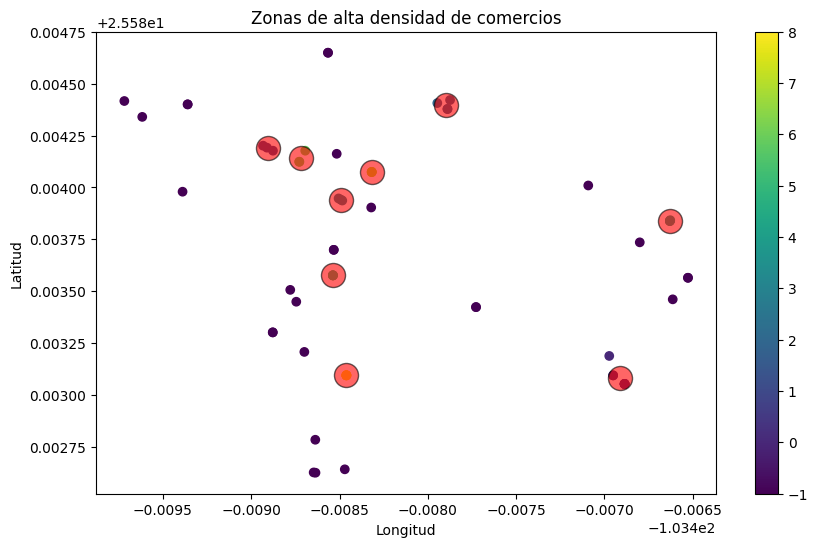

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

# Obtener las coordenadas de los comercios
coords = df[['latitud', 'longitud']].values

# Realizar el clustering con DBSCAN
db = DBSCAN(eps=0.0001, min_samples=3).fit(coords)
df['Cluster'] = db.labels_

# Visualizar los clusters
plt.figure(figsize=(10, 6))

# Graficar los puntos con los colores de los clusters
scatter = plt.scatter(df['longitud'], df['latitud'], c=df['Cluster'], cmap='viridis')

# Calcular y graficar los centroides de los clusters
for cluster_id in np.unique(db.labels_):
    if cluster_id != -1:  # Ignorar los puntos que no se agrupan (label -1)
        cluster_points = df[df['Cluster'] == cluster_id]
        # Calcular el centroide del cluster
        centroide_lat = cluster_points['latitud'].mean()
        centroide_lon = cluster_points['longitud'].mean()
        
        # Graficar un círculo en el centroide
        plt.scatter(centroide_lon, centroide_lat, s=300, c='red', marker='o', edgecolors='black', alpha=0.6)

# Agregar detalles del gráfico
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Zonas de alta densidad de comercios')

# Mostrar la barra de colores (opcional)
plt.colorbar(scatter)

# Mostrar el gráfico
plt.show()


In [9]:
# Calcular los centroides de los clusters y añadir círculos para denotar alta densidad
for cluster_id in np.unique(db.labels_):
    if cluster_id != -1:  # Ignorar el ruido (cluster -1)
        cluster_points = df[df['Cluster'] == cluster_id]
        
        # Calcular el centroide (promedio de latitud y longitud)
        centroide_lat = cluster_points['latitud'].mean()
        centroide_lon = cluster_points['longitud'].mean()
        
        # Crear un círculo en el centroide (representa alta densidad)
        folium.Circle(
            location=[centroide_lat, centroide_lon],
            radius=50,  # Radio del círculo en metros
            color='red',
            fill=True,
            fill_opacity=0.4,
            popup=f'Centroide del Cluster {cluster_id}',
        ).add_to(mapa)

# Guardar el mapa interactivo (opcional)
#mapa.save("Plaza_comercial_Villa_con_circulos.html")

# Mostrar el mapa
mapa


In [10]:
df['Cluster'].value_counts()

Cluster
-1    27
 0     8
 8     5
 2     4
 5     4
 4     4
 3     3
 1     3
 6     3
 7     3
Name: count, dtype: int64

In [11]:
#df[df['Cluster']==0]

#tipo_esta_puntosur = analizar_columnas(df,'Establecimiento',100)
#tipo_esta_puntosur.to_csv("Tipo de comercios la Marina Puerto Cancun.csv", index=False, encoding='ISO-8859-1')

df_c1=df[df['Cluster']==0]
df_c1.to_csv("Tipo de comercios Plaza Almanara Torreon con mayor clouster.csv", index=False, encoding='utf-8')
